## Random Forest e Decision Tree
Neste projeto foram utilizados dados públicos do site LendingClub.com. Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que tem dinheiro (investidores). Um investidor, por sua vez, gostaria de investir em pessoas que tenham uma grande probabilidade de pagar de volta. Com base nisso, sera feito um modelo que ira prever se o mutuário ira pagar o empréstimo integralmente ou não.

___

## Os dados

o que as colunas representam:

   - **credit.policy**: 1 se o cliente atender aos critérios de subscrição de crédito, e 0 caso contrário.
   - **purpose**: O propósito do empréstimo (leva os valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
   - **int.rate**: TA taxa de juros do empréstimo, como proporção (uma taxa de 11% seria armazenada como 0,11). Os mutuários considerados pelo LendingClub.com como mais arriscados recebem taxas de juros mais altas.
   - **installment**: As prestações mensais devidas pelo mutuário se o empréstimo for financiado.
   - **log.annual.inc**: renda anual auto-relatada do mutuário.
   - **dti**: rendimento do mutuário (montante da dívida dividido pelo rendimento anual).
   - **fico**: A pontuação de crédito FICO do mutuário.
   - **days.with.cr.line**: O número de dias que o mutuário tem uma linha de crédito.
   - **revol.bal**: oOsaldo rotativo do mutuário (valor não pago no final do ciclo de faturamento do cartão de crédito).
   - **revol.util**: A taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usado em relação ao crédito total disponível).
   - **inq.last.6mths**: O número de consultas do mutuário por credores nos últimos 6 meses.
   -**delinq.2yrs**: O número de vezes que o mutuário estava com mais de 30 dias de atraso em um pagamento nos últimos 2 anos.
   -**pub.rec** : O número de registros públicos depreciativos do mutuário (pedidos de falência, gravames fiscais ou julgamentos).
   -**not.fully.paid**: 0 pagou tudo, 1 falta pagar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('../input/lending-club-loan-data-analysis/loan_data.csv')
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [3]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

## Análise exploratória de dados

Text(0.5, 0, 'FICO')

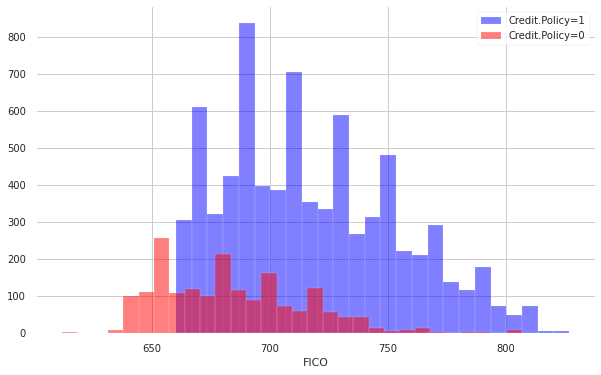

In [6]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

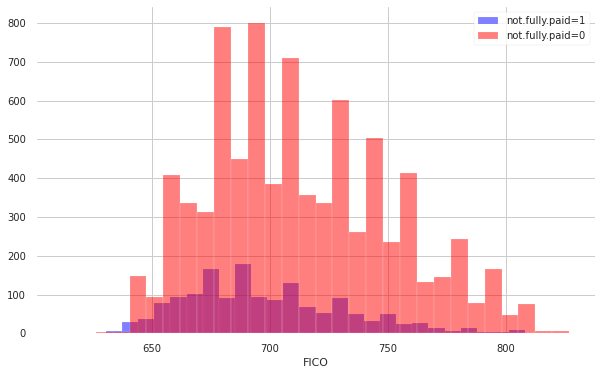

In [7]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

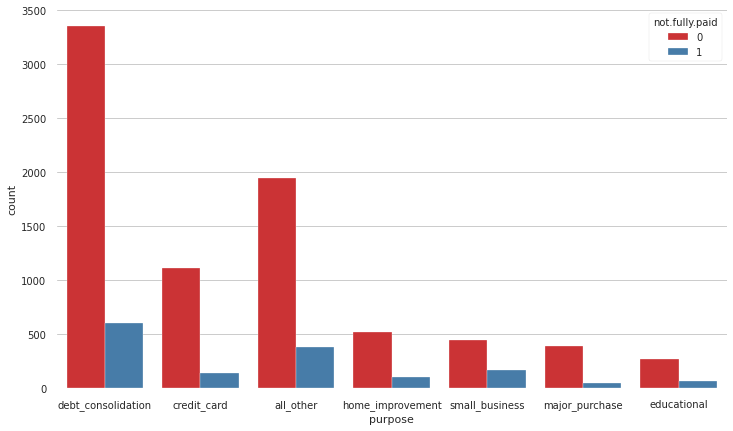

In [8]:
plt.figure(figsize=(12,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

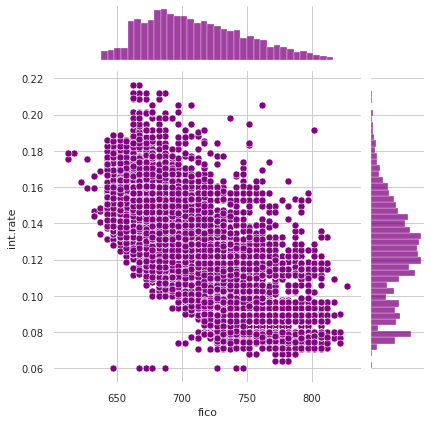

In [9]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

## Características Categóricas

A coluna de purpose é categórica. Isso significa que é necessário usar variáveis dummy para que o sklearn seja capaz de interpretá-la.

In [10]:
cat_feats = ['purpose']

final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

In [11]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Treinando o Modelo de Decision Tree

In [12]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Previsões e avaliação da Decision Tree

In [13]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [14]:
print(confusion_matrix(y_test,predictions))

[[2002  429]
 [ 345   98]]


## Treinando o Modelo de Random Forest

In [15]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Previsões e avaliação da Random Forest

In [16]:
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.61      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [17]:
print(confusion_matrix(y_test,predictions))

[[2424    7]
 [ 432   11]]
